# Movie Sentiment Analysis
https://www.kaggle.com/c/word2vec-nlp-tutorial/

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd


train = pd.read_csv('../input/labeledTrainData.tsv', delimiter="\t")
test = pd.read_csv('../input/testData.tsv', delimiter="\t")
train = train.iloc[:3000,:]
test = test.iloc[:3000,:]
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
print (train.shape)
print (test.shape)

(3000, 3)
(3000, 2)


In [4]:
y_train = train['sentiment']


In [5]:
import re

def review_to_wordlist(review):

    review_text = re.sub("[^a-zA-Z]"," ", review)
    words = review_text.lower()
    
    return(words)

y_train = train['sentiment']
train_data = []

for i in range(0,len(train['review'])):
    if i % 1000 == 0:
        print ('training process line: ', str(i))
    train_data.append(review_to_wordlist(train['review'][i]))
        
train_data = np.array(train_data)
test_data = []
for i in range(0,len(test['review'])):
    if i % 1000 == 0:
        print ('testing process line: ', str(i))
    test_data.append(review_to_wordlist(test['review'][i]))
    
test_data = np.array(test_data)

training process line:  0
training process line:  1000
training process line:  2000
testing process line:  0
testing process line:  1000
testing process line:  2000


In [6]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer()
# data_train_count = vectorizer.fit_transform(train_data)
# data_test_count  = vectorizer.transform(test_data)

tfidf = TfidfVectorizer(
           ngram_range=(1, 3),
           use_idf=1,
           smooth_idf=1,
           stop_words = 'english')


data_train_count_tf = tfidf.fit_transform(train_data)
data_test_count_tf  = tfidf.transform(test_data)


/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


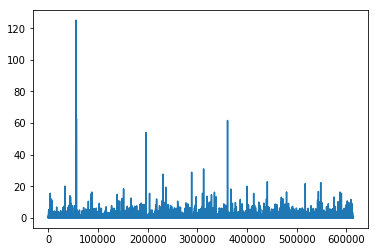

,term,tfidf
55733,br,125.045936
56419,br br,62.696941
360736,movie,61.661410
196478,film,54.008642
312535,like,31.022925


In [7]:
# print (data_train_count.shape, y_train.shape, data_test_count.shape)
# print (data_train_count_tf)


word_freq_df = pd.DataFrame({'term': tfidf.get_feature_names(), 'tfidf':data_train_count_tf.toarray().sum(axis=0)})
plt.plot(word_freq_df.tfidf)

plt.show() 


word_freq_df_sort = word_freq_df.sort_values(by=['tfidf'], ascending=False)
word_freq_df_sort.head()

In [8]:

from sklearn.naive_bayes import MultinomialNB 

clf = MultinomialNB()
clf.fit(data_train_count_tf, y_train)
from sklearn.model_selection import cross_val_score
import numpy as np

print ("score: ", np.mean(cross_val_score(clf, data_train_count_tf, y_train, cv=10, scoring='accuracy')))

score:  0.8493333333333334


In [9]:
pred = clf.predict(data_test_count_tf)
print (pred)

df = pd.DataFrame({"id": test['id'],"sentiment": pred})

df.to_csv('submission.csv',index = False, header=True)

[1 0 0 ... 0 0 1]
